# Práctica Introductoria al Aprendizaje No Supervisado

### Objetivos de la hoja
- Aprender a preparar datos para ML no supervisado.
- Reducir la dimensionalidad para visualizar y entender los datos.
- Aplicar y evaluar técnicas de agrupamiento (clustering).
- Elegir el número óptimo de clusters.
Interpretar y visualizar resultados.


## Ejercicio 1. Cargando y explorando los datos


In [1]:
# a) Descarga el dataset Iris usando sklearn.datasets.load_iris() o desde este enlace de UCI.
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
# b) Carga el dataset en un DataFrame de pandas.
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
'''
c) Realiza una exploración básica:
¿Cuántas filas y columnas hay?
¿Qué significa cada columna?
¿Hay valores nulos?
'''
print(df.info)
# Hay 150 filas y 4 columnas.
print(df.columns)
'''
Las columnas son:
 - sepal length (cm): Largo del sépalo de la flor.
 - sepal width (cm): Ancho del sépalo de la flor.
 - petal length (cm): Largo del pétalo de la flor.
 - petal width (cm): Ancho del pétalo de la flor.
'''

df.isnull().sum()
# No hay valores nulos.

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>
Index([

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


## Ejercicio 2. Preprocesamiento y estandarización

In [4]:
# a) ¿Por qué es importante escalar o estandarizar los datos antes de aplicar clustering?
'''
Es importante escalar o estándarizar los datos antes de aplicar clustering ya que
esta técnica se encarga de agrupar datos similares entre sí y es sensible a los
outliers.
'''

'\nEs importante escalar o estándarizar los datos antes de aplicar clustering ya que\nesta técnica se encarga de agrupar datos similares entre sí y es sensible a los\noutliers.\n'

In [5]:
# b) Utiliza StandardScaler para estandarizar los datos numéricos.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df)

In [7]:
# c) Vuelve a mostrar un resumen estadístico y compara con el original.
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
scaled_df.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


## Ejercicio 3. Reducción de dimensionalidad (PCA)

In [9]:
# a) Explica brevemente qué es y para qué sirve PCA (en tus propias palabras).
'''
El PCA (Análisis de Componentes Principales) se trata de un método matemático de
reducción de la dimensionalidad que permite ver los datos en 2D o 3D.
Esto permite un mejor análisi, visualización y procesamiento de los datos.
'''

'\nEl PCA (Análisis de Componentes Principales) se trata de un método matemático de\nreducción de la dimensionalidad que permite ver los datos en 2D o 3D.\nEsto permite un mejor análisi, visualización y procesamiento de los datos.\n'

In [10]:
# b) Aplica PCA para reducir los datos a 2 dimensiones.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Paso 1: Centramos los datos
mean = np.mean(scaled_df, axis=0)
centered_data = scaled_df - mean

# Paso 2: Calcular la matriz de covarianza
cov_matrix = np.cov(centered_data, rowvar=False)

# Paso 3: Calcular los valores propios y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar por valores propios en orden descendente
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Paso 4: Transformar los datos al nuevo espacio, un array de numpy
pca_data = centered_data @ eigenvectors

# Crear un DataFrame para mostrar los datos transformados
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2"])

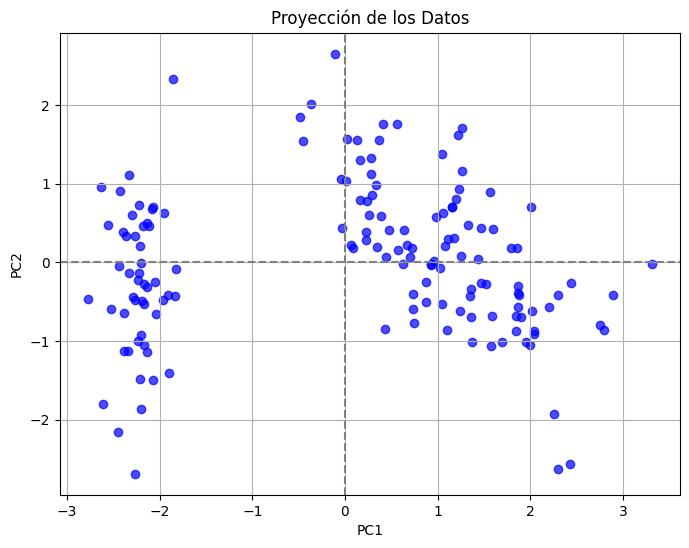

In [11]:
# c) Haz un scatter plot (gráfico de dispersión) con los dos componentes principales.
pca_data = (centered_data @ eigenvectors).to_numpy()
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], color='blue', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Proyección de los Datos")
plt.grid()
plt.show()

## Ejercicio 4. Clustering con K-Means

In [12]:
# a) Explica qué es el clustering y en qué consiste el algoritmo K-Means
'''
El clustering es una técnica de aprendizaje no supervisado que agrupa datos en
subconjuntos llamados clusters, con el fin de descubrir patrones en datos sin
etiquetar.
El algoritmo K-Means es un algoritmo no supervisado que agrupa en clusters según
la similitud de sus características. Se usa en áreas como marketing,
recomendación de contenidos y análisis de datos.

'''

'\nEl clustering es una técnica de aprendizaje no supervisado que agrupa datos en\nsubconjuntos llamados clusters, con el fin de descubrir patrones en datos sin\netiquetar.\nEl algoritmo K-Means es un algoritmo no supervisado que agrupa en clusters según\nla similitud de sus características. Se usa en áreas como marketing,\nrecomendación de contenidos y análisis de datos.\n\n'

In [13]:
# b) Aplica K-Means con n_clusters=3 al dataset ya estandarizado.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(pca_data)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [14]:
# c) Añade una columna al DataFrame con la etiqueta de cluster asignada a cada
# muestra.
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

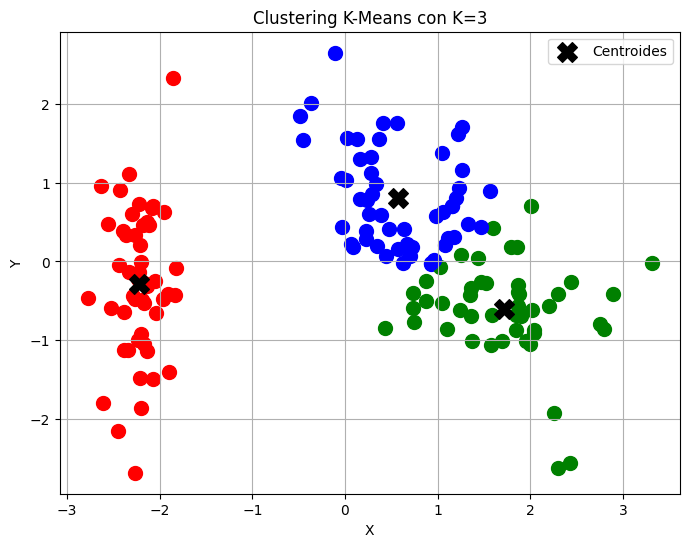

In [15]:
# d) Visualiza los resultados en el plano de los dos primeros componentes
# principales, coloreando por cluster en vez de por especie.

# Graficar los puntos con sus clusters asignados
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i in range(len(pca_data)):
  plt.scatter(pca_data[i, 0],pca_data[i, 1], c=colors[labels[i]], s=100)
# Graficar centroides
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label="Centroides")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Clustering K-Means con K=3")
plt.legend()
plt.grid()
plt.show()

## Ejercicio 5. ¿Cómo elegir el número de clusters?

In [16]:
# a) Explica brevemente los métodos del “codo” (elbow method) y la “silhouette”.
'''
El método del codo (elbow method) es una técnica que deja de agregar clusters
cuando ya no se reduce mucho la inercia. Se llama así por la gráfica.
El método coeficiente de silueta (silhouette) es una técnica que mide qué tan
similar es un individuo a su cluster y qué tan diferente al cluster más cercano.
El mejor valor es 1.
'''

'\nEl método del codo (elbow method) es una técnica que deja de agregar clusters\ncuando ya no se reduce mucho la inercia. Se llama así por la gráfica.\nEl método coeficiente de silueta (silhouette) es una técnica que mide qué tan\nsimilar es un individuo a su cluster y qué tan diferente al cluster más cercano.\nEl mejor valor es 1.\n'

Distortion values:
1 : 4.000000000000002
2 : 1.4824113664334868
3 : 1.273498245687864
4 : 0.7623604776033186
5 : 0.6069844660739683
6 : 0.5436717133047837
7 : 0.5385182622489524
8 : 0.42951165663215146
9 : 0.371379336528913


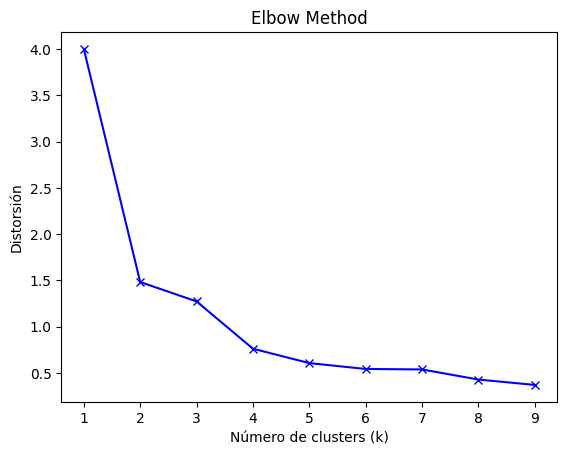

In [17]:
# b) Usando el dataset escalado, calcula la inercia (SSE) para valores de K de 1 a
# 10 y haz la gráfica del codo.
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(scaled_df)

    distortions.append(sum(np.min(cdist(scaled_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / scaled_df.shape[0])

    inertias.append(kmeanModel.inertia_)

    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distorsión')
plt.title('Elbow Method')
plt.show()

In [18]:
# c) Calcula el silhouette score para valores de K entre 2 y 6.
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters=2, random_state=7)
predicted_labels = model.fit_predict(scaled_df)
silhouette_val = silhouette_score(scaled_df, predicted_labels)
print("Silhouette Score:", silhouette_val)
'''
¿Cuál te parece el valor más adecuado de K? Justifica tu elección.
El valor más adecuado para K es 2 ya que es la mayor silhouette score
y se encuentra es el punto dónde se aprecia mayor cambio en el elbow method.
'''

Silhouette Score: 0.5817500491982808


'\n¿Cuál te parece el valor más adecuado de K? Justifica tu elección.\nEl valor más adecuado para K es 2 ya que es la mayor silhouette score\ny se encuentra es el punto dónde se aprecia mayor cambio en el elbow method.\n'

## Ejercicio 6. Interpretando resultados

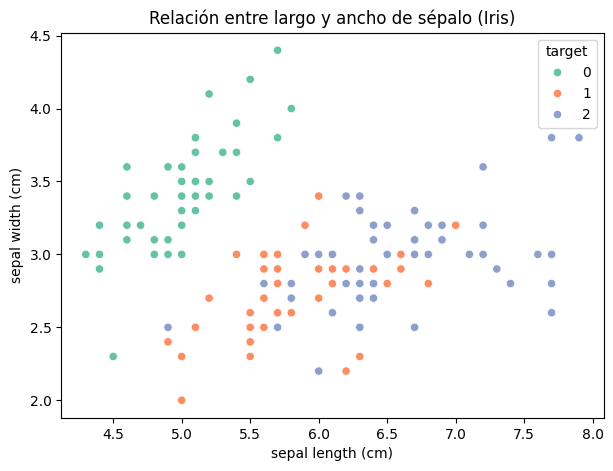

'\n¿Coinciden perfectamente? ¿Por qué crees que ocurre eso?\nNo del todo pero en gran medida ya que las flores tienen características que las\ndiferencian de las otras especies. Sobre todo la 1 y la 2 se mezclan.\n\n'

In [19]:
# a) Compara los clusters encontrados con las especies reales (puedes usar una
# tabla de contingencia con pandas).
from sklearn.datasets import load_iris
import seaborn as sns

iris = load_iris(as_frame=True)
df_iris = iris['frame']

plt.figure(figsize=(7,5))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=df_iris, palette='Set2')
plt.title('Relación entre largo y ancho de sépalo (Iris)')
plt.show()

'''
¿Coinciden perfectamente? ¿Por qué crees que ocurre eso?
No del todo pero en gran medida ya que las flores tienen características que las
diferencian de las otras especies. Sobre todo la 1 y la 2 se mezclan.

'''

In [20]:
# b) ¿Qué información útil se puede obtener de un análisis no supervisado como este?
'''
De un análisis no supervisado como este podemos agrupar las plantas según su
morfología sin necesidad de saber explícitamente la especie.
'''

'\nDe un análisis no supervisado como este podemos agrupar las plantas según su\nmorfología sin necesidad de saber explícitamente la especie.\n'

## Ejercicio 7. Detección de valores atípicos (bonus)

In [46]:
# a) Aplica el algoritmo Isolation Forest para buscar valores atípicos en el
# dataset de iris.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import numpy as np

# Usar solo las características:
X = df_iris.drop(columns=["target"])

# Isolation Forest:
iso = IsolationForest(random_state=0)
y_pred = iso.fit_predict(X)

 =

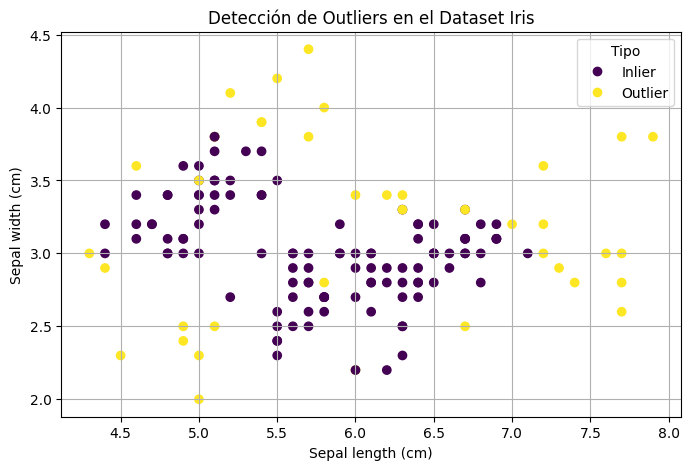

'\n¿Hay alguno? ¿Tiene sentido desde el punto de vista biológico?\nSí y, desde el punto de vista biológico, tiene sentido que haya flores que\ndestaquen, por ejemplo, por un mayor ancho de pétalos o tallo.\n'

In [54]:
# b) Visualiza los datos y resalta los posibles outliers.
import matplotlib.pyplot as plt

# Convertimos -1 (outlier) y 1 (inlier) a 1 y 0 para graficar los colores
outlier_flags = [1 if val == -1 else 0 for val in y_pred]

# Visualizar: coloreamos por si es outlier o no
plt.figure(figsize=(8, 5))
scatter = plt.scatter(
    df_iris["sepal length (cm)"],
    df_iris["sepal width (cm)"],
    c=outlier_flags
)

handles, _ = scatter.legend_elements() # Sin el _ no muestra la legenda correctamente.
plt.legend(handles, ["Inlier", "Outlier"], title="Tipo")
plt.title("Detección de Outliers en el Dataset Iris")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.grid()
plt.show()

'''
¿Hay alguno? ¿Tiene sentido desde el punto de vista biológico?
Sí y, desde el punto de vista biológico, tiene sentido que haya flores que
destaquen, por ejemplo, por un mayor ancho de pétalos o tallo.
'''